# **Dự đoán bệnh tiểu đường**


---



## **1. Định nghĩa vấn đề (Define Problem)**


+ **Mô tả**:
    + Các đặc điểm được đo từ mỗi mẫu
+ **Dữ liệu vào**:
    + Pregnancies
    + Glucose
    + BloodPressure
    + SkinThickness
    + Insulin
    + BMI
    + DiabetesPedigreeFunction
    + Age
+ **Kết quả**:
class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)



## **2. Chuẩn bị vấn đề (Prepare Problem)**

### **2.1. Khai báo thư viện (Load Libraries)**

In [1]:
# importing pandas, and other necessary modules
import pandas as pd
import os, sys
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

### **2.2. Nạp dữ liệu (Load Dataset)**

In [2]:
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = "/content/drive/MyDrive/pima-indians-diabetes.csv"
data_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Class"]
df_dataset = pd.read_csv(data_path, names = data_names)

## **3.** **Phân tích dữ liệu (Analyze Data)**












### **3.1. Thống kê mô tả (Descriptive Statistics)**

#### **(1)** **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [4]:
# shape
print(f'+ Shape: {df_dataset.shape}')
# types
print(f'+ Data Types: \n{df_dataset.dtypes}')
# head, tail
print(f'+ Contents: ')
print(df_dataset.head(5))
print(df_dataset.tail(5))
# info
df_dataset.info()

+ Shape: (768, 9)
+ Data Types: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Class                         int64
dtype: object
+ Contents: 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Class  
0                     0.627   50      1  
1                     0.351   31      0  
2                     0.672   32      1  
3              

**Nhận xét:**
*   Dữ liệu có 8 tính chất để phân lớp: Pregnancies, Glucose, BloodPressure  SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
*   Tổng số dòng dữ liệu là 768 dòng
*   Dữ liệu để phân lớp là ở cột class


#### **(2)** **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [5]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


**Nhận xét:**


*   Dữ liệu không có dòng trùng
*   Dữ liệu không có giá trị rỗng (NaN, Null)












#### **(3)** **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [6]:
description = df_dataset.describe().T
print(description)

                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Class                     768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinT

#### **(4)** **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [7]:
df_dataset["Class"].value_counts()

0    500
1    268
Name: Class, dtype: int64

**Nhận xét:**


*   Dữ liệu cần phân loại 2 trạng thái: dương tính với bệnh hoặc âm tính với bệnh
*   Lớp giá trị 1 có 268, lớp giá trị 0 có 500




#### **(5)** **Mối tương quan giữa các tính chất (Correlations)**

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả.

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn.

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

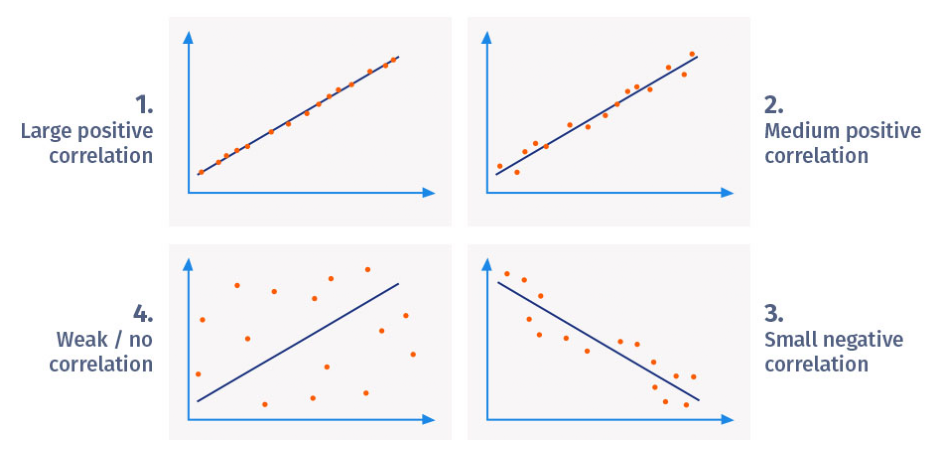

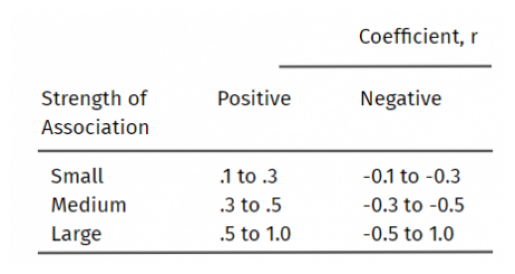

In [8]:
plt.figure(figsize=(12, 6));
plt.imshow(plt.imread("/content/drive/MyDrive/corr1.png")), plt.axis("off"), plt.show();
print ("")
plt.imshow(plt.imread("/content/drive/MyDrive/corr2.png")), plt.axis("off"), plt.show();

In [9]:
correlations = df_dataset.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Nhận xét:**
- Số lần mang thai có mối tương quan mạnh mẽ với độ tuổi (Age): 0.544341
- Nồng độ glucose trong máu có mối tương quan mạnh với Class: 0.466581
- Tương quan giữa glucose và insulin là 0.33
- Tương quan giữa glucose và BMI là 0.22
- Tương quan giữa độ dày da và độ tuổi là -0.11


### **3.2. Hiển thị dữ liệu (Visualize Data)**

#### **(1) Hiển thị trên từng tính chất đơn (Univariate Plots)**

**Box and whisker plots**
+ https://www.simplypsychology.org/boxplots.html
+ So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
+ So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
+ Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
+ Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    + Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    + Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    + Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

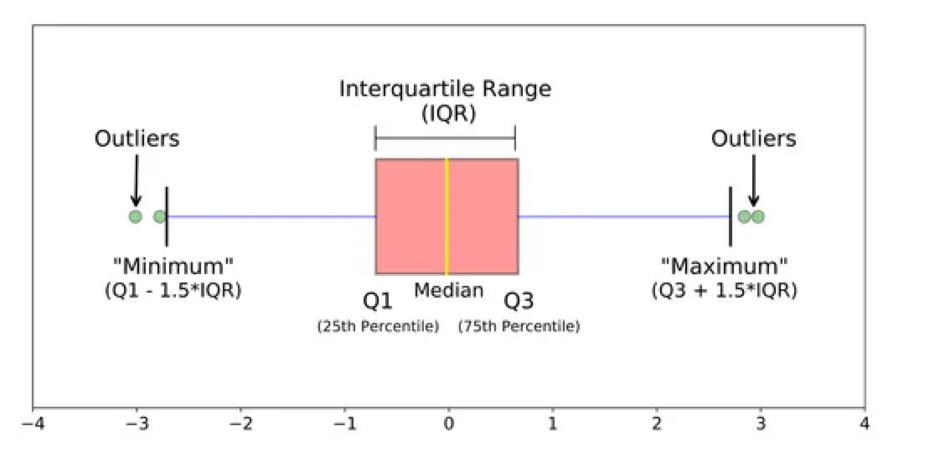

In [10]:
plt.figure(figsize=(12, 6)), plt.imshow(plt.imread("/content/drive/MyDrive/boxplots.png")), plt.axis("off"), plt.show();

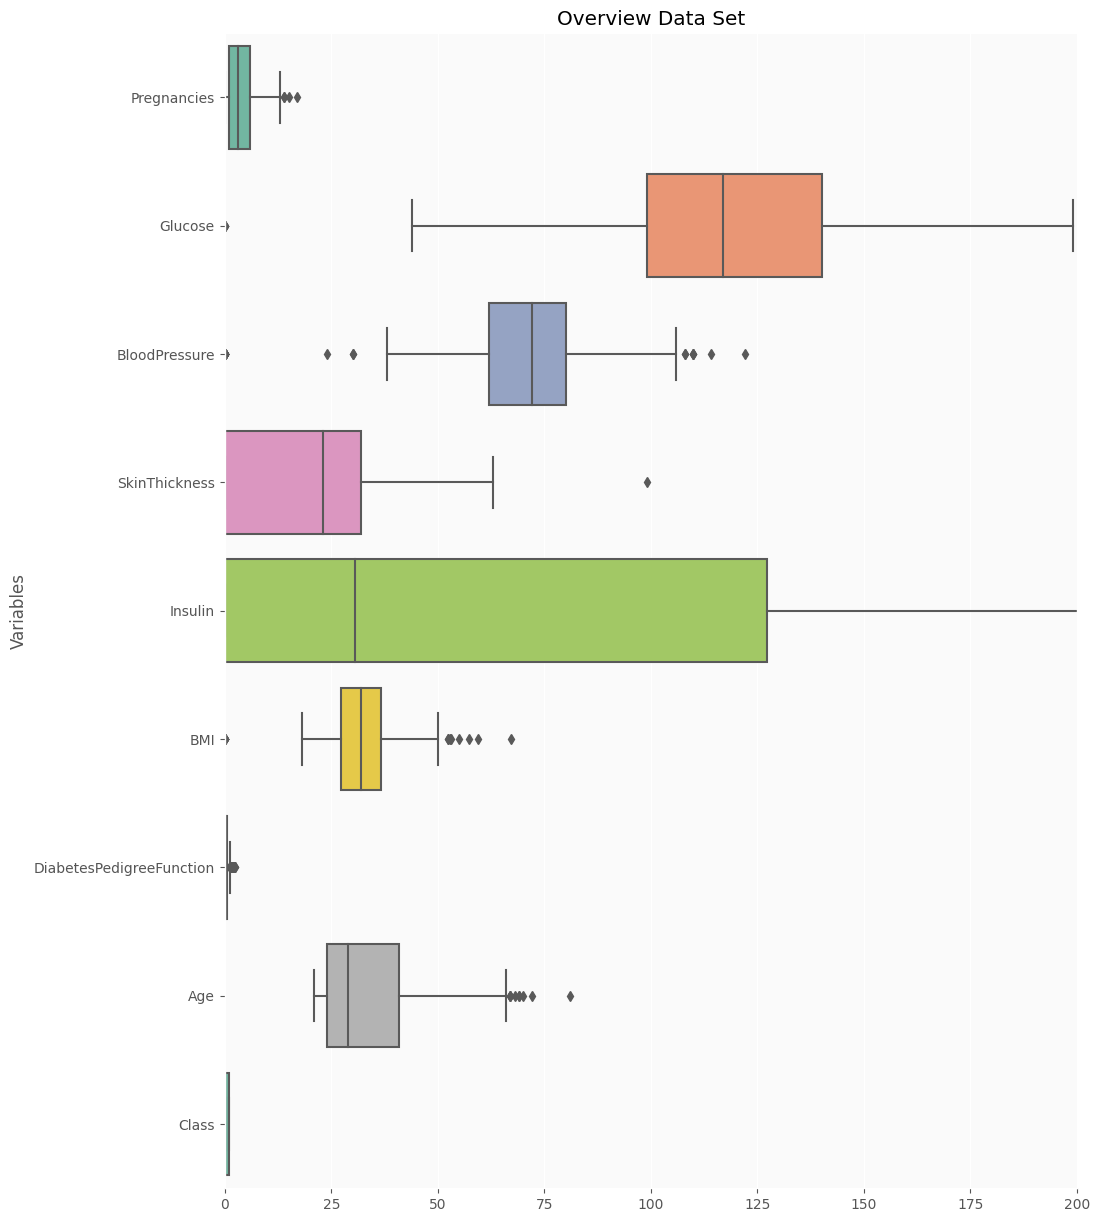

In [11]:
plt.style.use('ggplot') # Using ggplot2 style visuals

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df_dataset,
  orient = 'h',
  palette = 'Set2')


**Nhận xét:**
- Độ trải rộng giữa các tính chất khá khác nhau
- Phân bố giá trị của BMI khá cân bằng




**Biểu đồ Histogram**

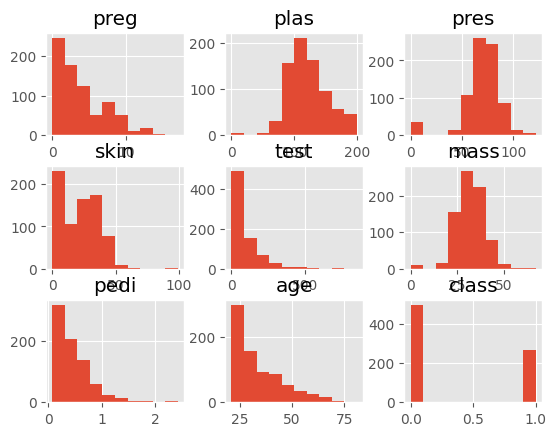

In [12]:
from matplotlib import pyplot
from pandas import read_csv
name1 = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data_path, names = name1)
data.hist()
pyplot.show()

#### **(2) Hiển thị nhiều tính chất (Multivariate Plots)**

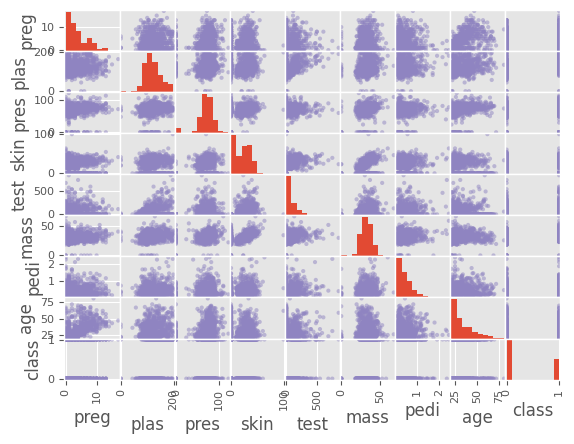

In [13]:
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
name1 = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data_path, names = name1)
scatter_matrix(data, color = '#8f84c1')
pyplot.show()


*   Các cặp tính chất có độ tương đồng cao:


> (Pregnancies và Age) = 0.544341






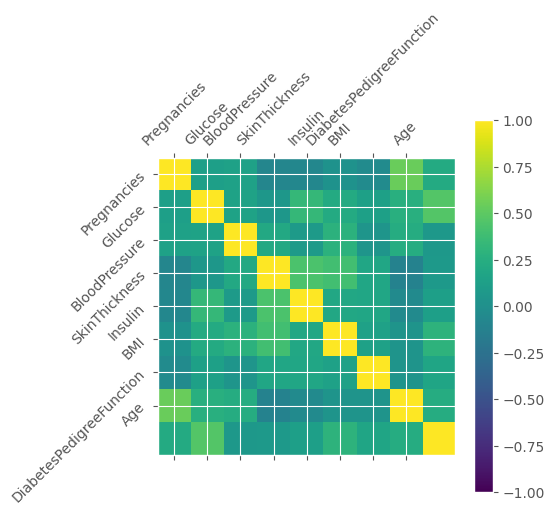

In [14]:
correlations = df_dataset.corr()

plt.matshow(correlations, vmin=-1, vmax=1)
plt.colorbar()

# Set tick locations and labels for both x and y axes
tick_locations = np.arange(0, len(df_dataset.columns) - 1)
plt.xticks(tick_locations, df_dataset.columns[:-1], rotation=45)
plt.yticks(tick_locations, df_dataset.columns[:-1], rotation=45)

plt.show()

**Nhận xét**:
- Có thể thấy rằng không có mối quan hệ tuyến tính chặt chẽ giữa bất kỳ biến nào.
- Có mối quan hệ tuyến tính trung bình giữa Tuổi và Số lần mang thai, BMI và Độ dày nếp gấp da, Insulin và Glucose.


## **4. Chuẩn bị dữ liệu (Prepare Data)**

### **4.1. Làm sạch dữ liệu (Data Cleaning)**

#### **(1)** **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [15]:
df_clean = df_dataset.copy()

#### **(2)** **Xóa dữ liệu trùng nhau**

In [16]:
print(df_dataset[df_dataset.duplicated()])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Class]
Index: []


**Nhận xét:**

- Vì data không có giá trị trùng lặp nên dừng ở bước này

#### **(3)** **Xử lý giá trị rỗng, không hợp lệ**

In [17]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


##### Example
Nếu có dữ liệu Null, hay Nan thì chúng ta có các cách giải quyết sau:
+ Chúng ta xóa bỏ cột tính chất vi phạm:

```python
df_clean.drop("cột_vi_phạm", axis=1)
```
+ Chúng ta xóa bỏ các dòng vi phạm:

```python
df_clean.dropna(subset=["cột_vi_phạm", ...])
```

+ Điền giá trị hằng số (như số 0), hoặc nội suy bằng phần tử median:

```python
median = df_clean["cột_vi_phạm"].median()
df_clean["cột_vi_phạm"].fillna(median, inplace=True)
```

### **4.2. Biến đổi dữ liệu (Data Transforms)**

---



#### **(1) Chuyển đổi dữ liệu danh mục (Category) thành dữ liệu số**

**Nhận xét:**
- Vì data ban đầu đã là dữ liệu số nên không cần chuyển đổi dữ liệu

#### **(2) Chuyển đổi dữ liệu danh mục (Category) thành dạng OneHot**

#### **(3) Chuẩn hóa dữ liệu (Data Normalize)**

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [18]:
# Min-Max Normalization
scale_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_clean[scale_columns])
df_clean_minmax = df_clean.copy()
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])
df_clean_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


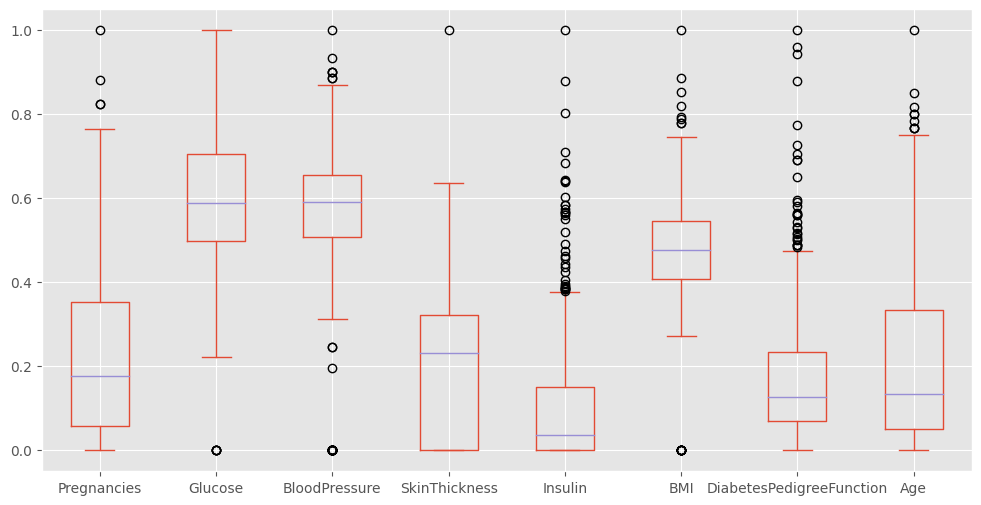

In [19]:
df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,6));

In [20]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


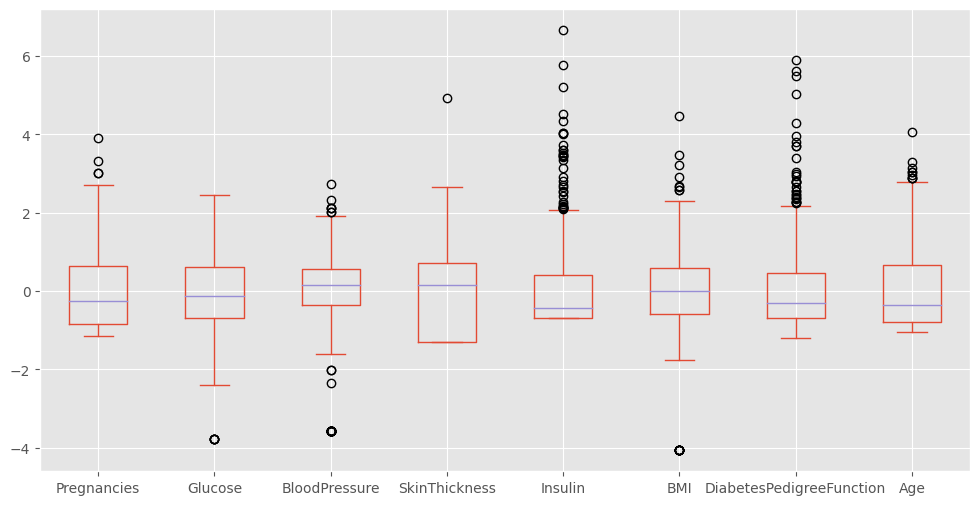

In [21]:
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6));

In [22]:
correlations = df_clean_standard.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### **(4)** **Chia dữ liệu thực nghiệm**

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [23]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
print(X_data[:20, :])
print(y_data[:20])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01]
 [8.000e+00 1.250e+02 9.600e+01 0.000e+00 0.000e+00 0.000e+00 2.320e-01
  5.400e+01]
 [4.000e+00 1.100e+02 9.200e+01 0.000e+00 0.000e+00 3.760e+01 1.910e-01
  3.000e+01]
 [1.000e+01 1.680e+02 7.400e+01 0.000e+00 0.000e+00 3.800e+01 5.3

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')

+ Train/Test: Train Ratio = 0.69921875
+ Train: shape=(537, 8)
Input = 
[[4.00e+00 1.34e+02 7.20e+01 0.00e+00 0.00e+00 2.38e+01 2.77e-01 6.00e+01]
 [4.00e+00 1.16e+02 7.20e+01 1.20e+01 8.70e+01 2.21e+01 4.63e-01 3.70e+01]
 [5.00e+00 1.55e+02 8.40e+01 4.40e+01 5.45e+02 3.87e+01 6.19e-01 3.40e+01]
 [0.00e+00 1.46e+02 7.00e+01 0.00e+00 0.00e+00 3.79e+01 3.34e-01 2.80e+01]
 [3.00e+00 1.39e+02 5.40e+01 0.00e+00 0.00e+00 2.56e+01 4.02e-01 2.20e+01]]
Output = [1. 0. 0. 1. 1.]
+ Test: shape=(231, 8)
Input = 
[[  1.      0.     68.     35.      0.     32.      0.389  22.   ]
 [  2.    105.     58.     40.     94.     34.9     0.225  25.   ]
 [  2.    134.     70.      0.      0.     28.9     0.542  23.   ]
 [  4.     99.     72.     17.      0.     25.6     0.294  28.   ]
 [ 10.    133.     68.      0.      0.     27.      0.245  36.   ]]
Output = [0. 0. 1. 0. 0.]


In [25]:
labels = ["Negative", "Positive"]
class_encoder = LabelEncoder()
class_encoder.fit(labels)
save_dir = "exps/pima-indians-diabetes"
if os.path.exists(save_dir) == False: os.makedirs(save_dir)
# Save training data
np.savez(f'{save_dir}/data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
# Save cleaning data
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)
# Save encoders
joblib.dump(class_encoder, f'{save_dir}/class_encoder.joblib')

os.listdir(save_dir)
joblib.dump(class_encoder, f'{save_dir}/class_encoder.joblib')

['exps/pima-indians-diabetes/class_encoder.joblib']

In [26]:
# Kiểm tra phục hồi dữ liệu
dict(np.load(f'{save_dir}/data.npz')).keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [27]:
pd.read_excel(f'{save_dir}/df_clean.xlsx')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [28]:
joblib.load(f'{save_dir}/class_encoder.joblib').classes_

array(['Negative', 'Positive'], dtype='<U8')

# **Kết thúc**

In [29]:
!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks/KHDL.ipynb" --to html


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/KHDL.ipynb to html
[NbConvertApp] Writing 1565627 bytes to /content/drive/MyDrive/Colab Notebooks/KHDL.html
